In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pt
df = pd.read_csv("supermarket_sales - Sheet1.csv")

This dataset has supermarket stats for three months only which are January,Febuary and March. This dataset contains the bills/purchases made in 3 different branches of a supermarket.<br>
Branch and City are the same here. One city has one branch only. This makes it easier for analysis. Do not get confused between city and branch

In [2]:
df.drop('Invoice ID',axis=1,inplace=True)

In [3]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M')
df['Hour'] = df['Time'].dt.hour
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Day_Name'] = df['Date'].dt.day_name()
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Day,Month,Day_Name
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,5,1,Saturday
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,8,3,Friday
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,3,3,Sunday
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,27,1,Sunday
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,8,2,Friday


## Data Analysis

#### Total number of purchases for each branch/City
Across all the cities, this gives us the total number of purchases for each branch for the year.

In [5]:
branch_numbers_per_city = df.groupby('Branch')['City'].count().reset_index()
branch_numbers_per_city

,Branch,City
0,A,340
1,B,332
2,C,328


In [6]:
pt.bar(x=branch_numbers_per_city['Branch'],y=branch_numbers_per_city['City'], title="Number of Purchases for Each Branch")

#### Total Earnings per Branch/City
This gives the total earnings for each branch **without tax**

In [7]:
branch_total_earnings = df.groupby('Branch')['cogs'].sum().reset_index()
branch_total_earnings

,Branch,cogs
0,A,101143.21
1,B,101140.64
2,C,105303.53


In [8]:
pt.bar(branch_total_earnings,x='Branch',y='cogs',title='Earnings Per Branch')

#### Average Rating per Branch/City according to Gender

In [9]:
ratings = df.groupby(["Gender","Branch"])['Rating'].mean().round(decimals=2)
ratings

Gender  Branch
Female  A         6.84
        B         6.88
        C         7.16
Male    A         7.20
        B         6.76
        C         6.97
Name: Rating, dtype: float64

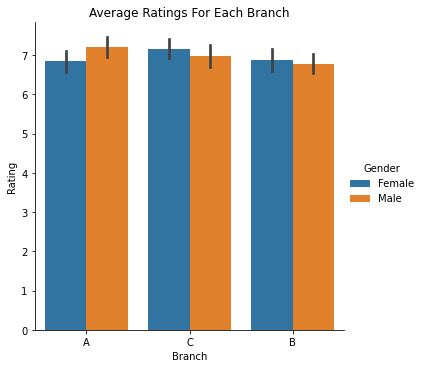

In [10]:
sns.catplot(x='Branch',y='Rating',estimator=np.average,data=df,hue='Gender',kind='bar').set(title='Average Ratings For Each Branch')
plt.savefig('avg_ratings_per_branch.png',transparent=False,dpi=300)

#### Number of products sold for product lines in each branch/City

In [11]:
quantity_per_store = df.groupby(['Branch','Product line'])['Quantity'].sum()
quantity_per_store

Branch  Product line          
A       Electronic accessories    322
        Fashion accessories       263
        Food and beverages        313
        Health and beauty         257
        Home and lifestyle        371
        Sports and travel         333
B       Electronic accessories    316
        Fashion accessories       297
        Food and beverages        270
        Health and beauty         320
        Home and lifestyle        295
        Sports and travel         322
C       Electronic accessories    333
        Fashion accessories       342
        Food and beverages        369
        Health and beauty         277
        Home and lifestyle        245
        Sports and travel         265
Name: Quantity, dtype: int64

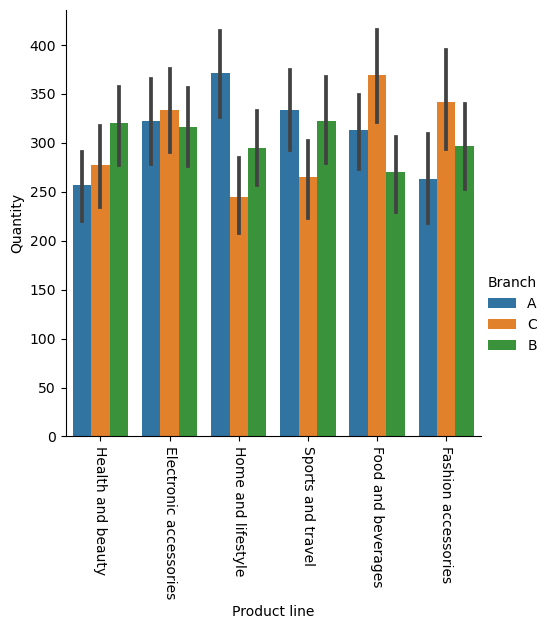

In [12]:
ax = sns.catplot(x='Product line',y='Quantity',data=df,hue='Branch',estimator=np.sum,kind='bar')
ax.set_xticklabels(rotation=270)

#### Quantity of Products sold per section


In [13]:
quantity_product_line = df.groupby('Product line')['Quantity'].sum().reset_index()
quantity_product_line

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


In [14]:
pt.bar(quantity_product_line,x='Product line',y='Quantity')

#### Analysis by Hour
This analysis shows that - for all 3 branches the busiest hours is after customers come back from their respective work.

(array([101.,  90.,  89., 103.,  83., 102.,  77.,  74.,  93., 188.]),
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 10 artists>)

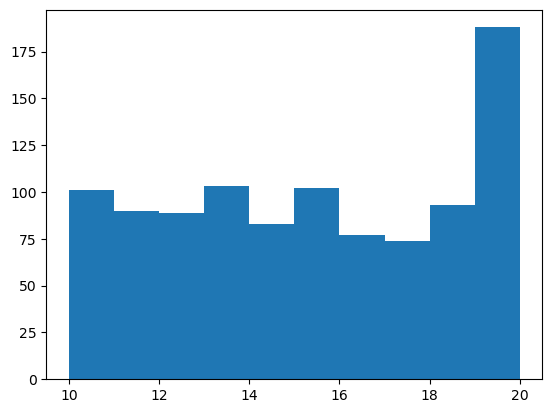

In [15]:
plt.hist(df['Hour'])

#### Analysis by Hours for Each City/Branch

The Y-axis represents the number of purchases made at a specific hour. The X-axis represents hours

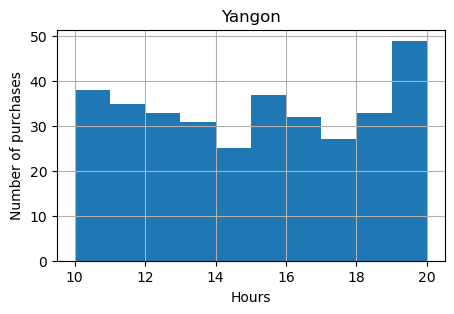

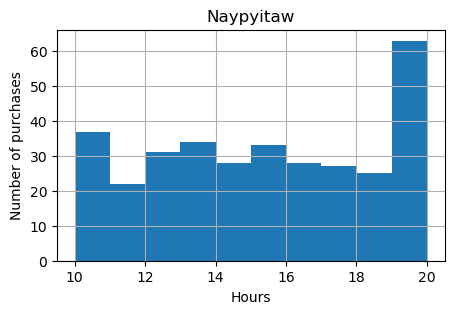

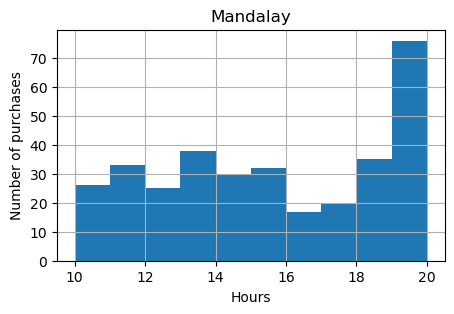

In [16]:
for city in df['City'].unique():
    plt.figure(figsize=(5,3))
    df[df['City']==city]['Hour'].hist()
    plt.title(city)
    plt.xlabel("Hours")
    plt.ylabel("Number of purchases")

#### Analysis By Day Name
Here we can see the number of purchases for each day in 3 months period

In [17]:
day_analyis = df['Day_Name'].value_counts()
day_analyis

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: Day_Name, dtype: int64

In [18]:
pt.bar(y=df['Day_Name'].value_counts().values,x=df['Day_Name'].value_counts().index, title="Analysis According to Day")

#### Analysis By Day Names for each City/Branch

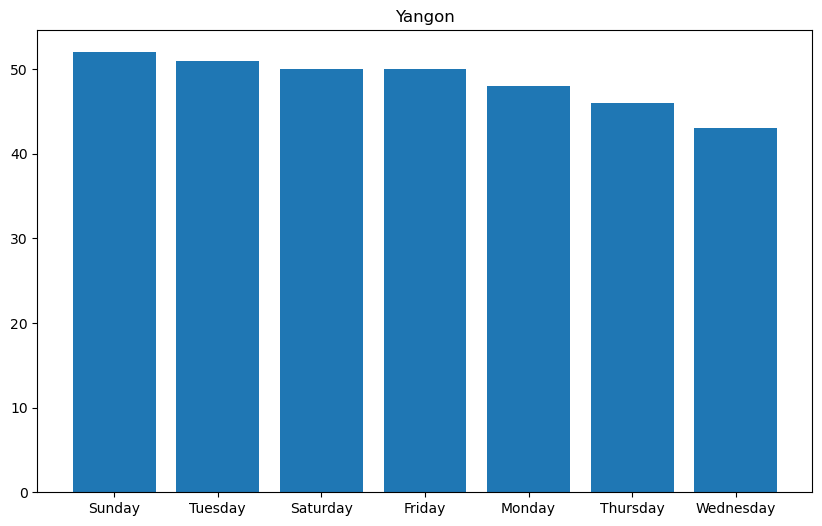

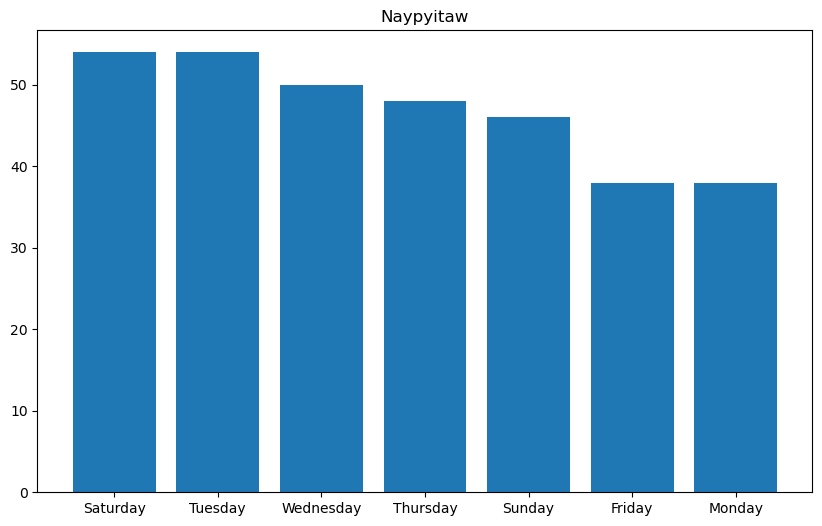

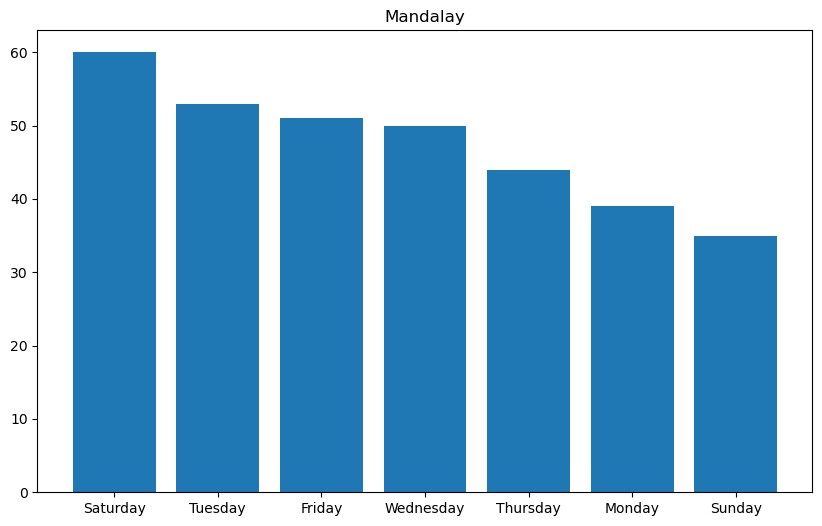

In [19]:
for city in df['City'].unique():
    plt.figure(figsize=(10,6))
    #sns.countplot(x=df[df['City']==city]['Day_Name'],data=df)
    plt.bar(df[df['City']==city]['Day_Name'].value_counts().index,df[df['City']==city]['Day_Name'].value_counts().values)
    plt.title(city)

#### Analysis By Days
This analysis if for days for all 3 months.

In [20]:
pt.bar(x=df['Day'].value_counts().index,y=df['Day'].value_counts().values)

#### Analysis By Days for Each Branch/City

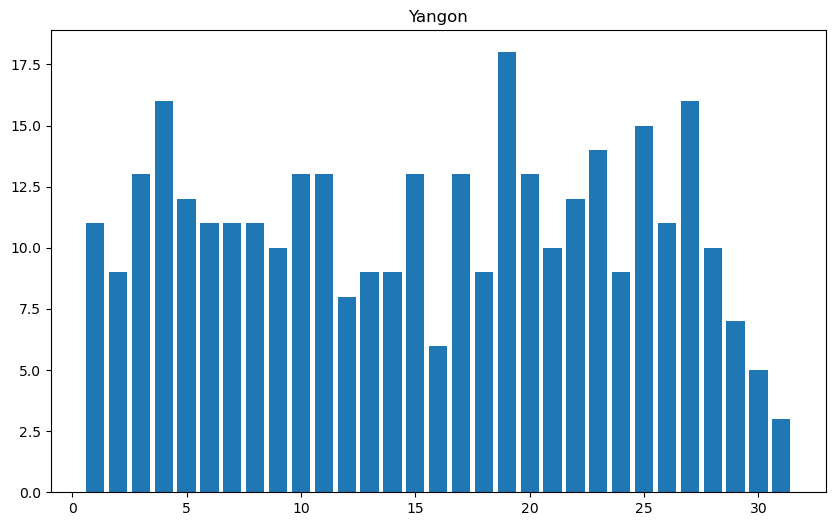

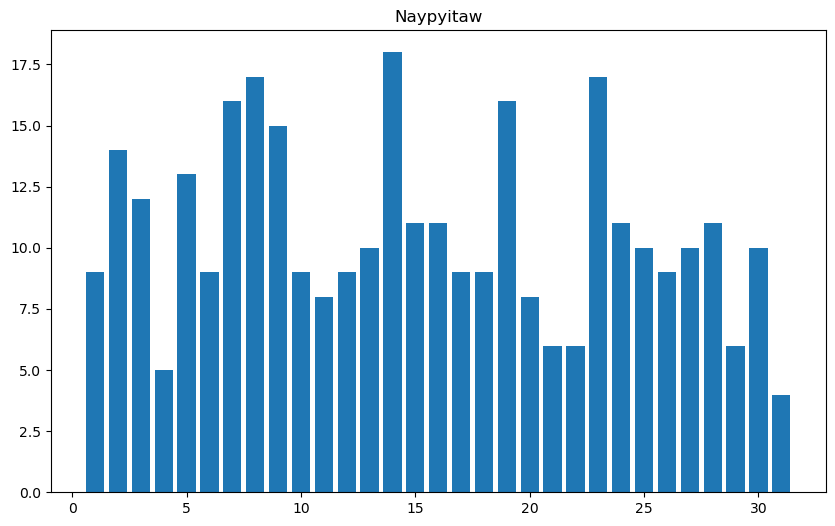

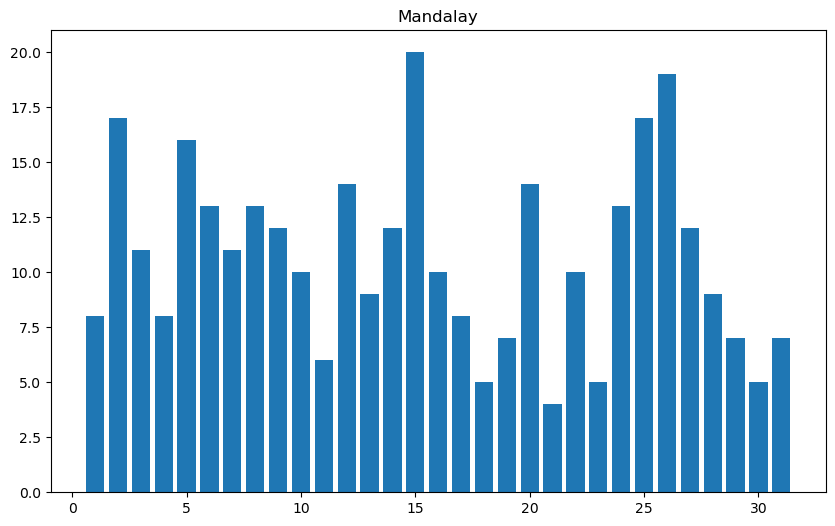

In [21]:
for city in df['City'].unique():
    plt.figure(figsize=(10,6))
    plt.bar(df[df['City']==city]['Day'].value_counts().index,df[df['City']==city]['Day'].value_counts().values)
    plt.title(city)

#### **Wrong Way** - Customer types in each of the branches
This is because it is giving the purchases made in the supermarket. Same customer can come as many times as they want and that will still be recorded

<AxesSubplot:xlabel='Customer type', ylabel='count'>

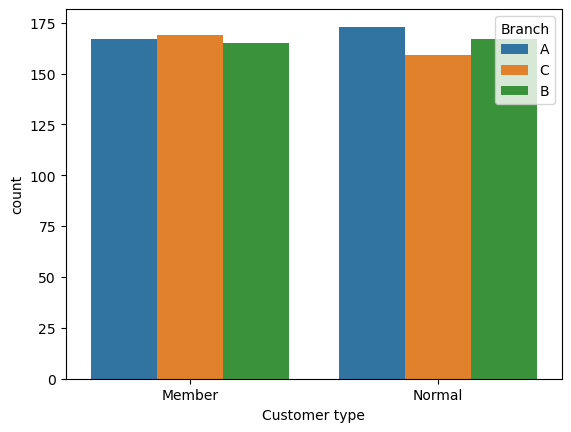

In [22]:
sns.countplot(x='Customer type',hue='Branch',data=df)